In [1]:
%run geometria.ipynb

In [2]:
Tolerance = 10e-12

# Funkcje pomocnicze

In [3]:
def det(a, b, c):
    return a[0] * b[1] + b[0] * c[1] + a[1] * c[0] - c[0] * b[1] - b[0] * a[1] - a[0] * c[1]


def orient(a, b, c):
    determinant = det(a, b, c)
    if determinant > Tolerance: # lewa strona
        return 1
    elif determinant < -Tolerance: # prawa strona
        return -1
    else: # współliniowe
        return 0
    
def get_lines(CH):
    lines = [] 
    for i in range(len(CH)):
        lines.append([CH[i], CH[(i+1)%len(CH)]])
    return lines


# Główny algorytm

In [4]:
def przyrostowy(points):
    scenes=[]
    scenes.append(Scene([PointsCollection(points, color = 'hotpink')]))
    
    # Punkty zostają posortowane. W ten sposób rozwiązany zostaje problem sprawdzania czy punkt nie należy do wnętrza otoczki.
    sorted_points = sorted(points, key = lambda p: (p[0],p[1]))
    
    # Z postortowanego zbioru usuwane są punkty o takiej samej współrzędnej x, z pominięciem tych punktów, 
    # które dla tego samego x mają najmneijszą i największą wartość y.
    new_points = []
    new_points.append(sorted_points[0])
    last_x = sorted_points[0][0]
    i = 1
    while i < len(sorted_points):
        if sorted_points[i][0] != last_x:
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        else:
            while i < len(sorted_points) and sorted_points[i][0] == last_x:
                i+=1
            i-=1
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        i+=1
    
    # Trzy pierwsze punkty z new_points dodawane są do otoczki w kolejności przeciwnej do ruchu wskazówek zegara
    CH = []
    if orient(new_points[0], new_points[1], new_points[2]) >= 0:
        CH.append(new_points[0])
        CH.append(new_points[1])
        CH.append(new_points[2])
    elif orient(new_points[0], new_points[1], new_points[2]) == -1:
        CH.append(new_points[0])
        CH.append(new_points[2])
        CH.append(new_points[1])
        
    lines = get_lines(CH)
    scenes.append(Scene([PointsCollection(points, color = 'hotpink')],
                       [LinesCollection(deepcopy(lines), color = 'lime')]))
    
    for i in range(3, len(new_points)):
        n = len(CH)
        point = new_points[i]
                
        upper_index = n-1
        lower_index = n-1
        # Szukany jest punkt, przez który przechodzi górna styczna poprowadzona z aktualnie sprawdzanego punktu
        while orient(point, CH[upper_index], CH[(upper_index+1) % n]) <= 0:
            upper_index = (upper_index+1)%n
            
        # Szukany jest punkt, przez który przechodzi dolna styczna poprowadzona z aktualnie sprawdzanego punktu 
        while orient(point, CH[lower_index], CH[(lower_index+n-1) % n]) >= 0:
            lower_index = (lower_index+n-1)%n
        
        scenes.append(Scene([PointsCollection(points, color = 'hotpink'),
                            PointsCollection(CH, color = 'green')],
                           [LinesCollection(deepcopy(lines), color = 'lime'),
                           LinesCollection([[point, CH[upper_index]], [point, CH[lower_index]]], color ='fuchsia')]))
        
        # Aktualizujemy otoczkę poprzez dodanie aktualnie rozpatrywanego punktu i tylko tych punktów otoczki, 
        # które nie znajdują się wewnątrz
        
        tmp_CH = []
        curr = upper_index
        tmp_CH.append(CH[upper_index])
        while curr != lower_index:
            curr = (curr + 1) % n
            tmp_CH.append(CH[curr])
        tmp_CH.append(point)
        
        CH = deepcopy(tmp_CH)
        lines = get_lines(CH)
        scenes.append(Scene([PointsCollection(points, color = 'hotpink'),
                            PointsCollection(CH, color = 'green')],
                           [LinesCollection(deepcopy(lines), color = 'lime')]))
        
    return CH, scenes

# Testowanie

Liczba punktów otoczki:  4
Punkty otoczki:  [(0, 3), (0, 0), (3, 0), (3, 3)]


<IPython.core.display.Javascript object>


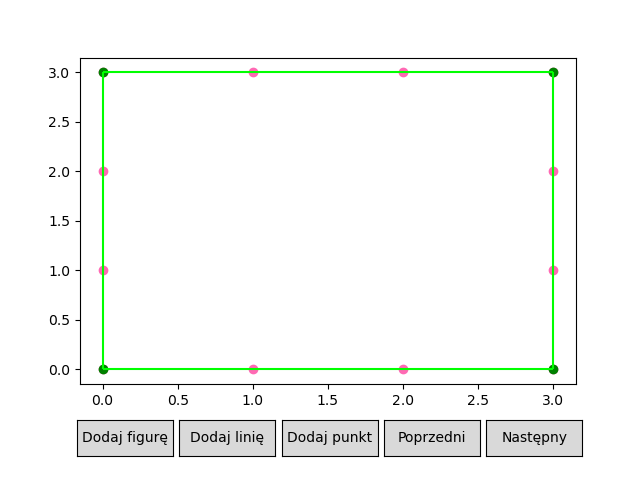

In [5]:
data = [(0,0),(1,0),(2,0),(3,0),(0,1),(0,2),(0,3),(3,3),(3,1),(3,2),(1,3),(2,3)]
CH, scenes = przyrostowy(data)
print("Liczba punktów otoczki: ", len(CH))
print("Punkty otoczki: ", CH)
plot = Plot(scenes=scenes)
plot.draw()

Liczba punktów otoczki:  14
Punkty otoczki:  [(98.98601783740808, 71.42739998327309), (91.72295508665253, 95.30363143400133), (47.39016123811193, 99.23110307604207), (10.944537512076668, 99.75024353280756), (0.7228025690490414, 96.03166265300467), (1.1502322267946674, 64.63900573078365), (2.312108251510425, 52.529767107583694), (5.8613534117400885, 17.737801073227068), (24.060288615488524, 1.6556425334062763), (44.52826352859732, 1.0309946988854124), (64.89106139450249, 2.0762134589097925), (83.56083698393981, 3.977881196327937), (95.85238801723152, 7.29572767296327), (99.07459305681513, 8.593133692415167)]


<IPython.core.display.Javascript object>


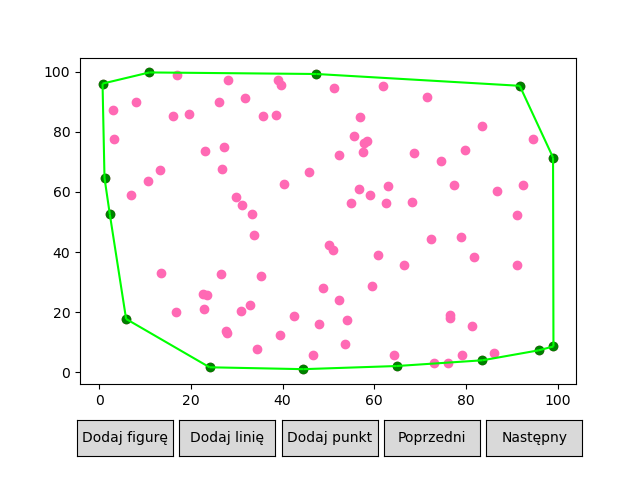

In [6]:
def generate_points(amount, low, high):
    a = np.random.rand(amount).astype(np.float64) * (high - low) + low
    b = np.random.rand(amount).astype(np.float64) * (high - low) + low
    return list(zip(a, b))

data = generate_points(100, 0, 100)
CH, scenes = przyrostowy(data)
print("Liczba punktów otoczki: ", len(CH))
print("Punkty otoczki: ", CH)
plot = Plot(scenes=scenes)
plot.draw()

Liczba punktów otoczki:  6
Punkty otoczki:  [(2, 2), (1, 2), (0, 1), (1, 0), (2, 0), (3, 1)]


<IPython.core.display.Javascript object>


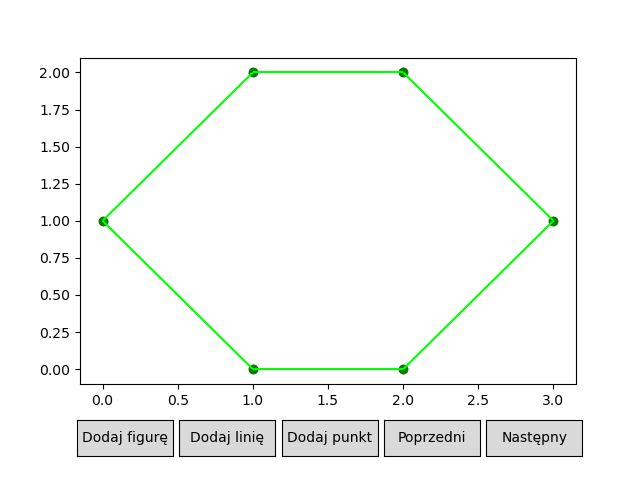

In [7]:
data = [(0,1), (1,2), (1, 0), (2,2), (2,0), (3,1)]
CH, scenes = przyrostowy(data)
print("Liczba punktów otoczki: ", len(CH))
print("Punkty otoczki: ", CH)
plot = Plot(scenes=scenes)
plot.draw()

# Algorytm bez wizualizacji

In [8]:
def przyrostowy_(points):
    # Punkty zostają posortowane. W ten sposób rozwiązany zostaje problem sprawdzania czy punkt nie należy do wnętrza otoczki.
    sorted_points = sorted(points, key = lambda p: (p[0],p[1]))
    
    # Z postortowanego zbioru usuwane są punkty o takiej samej współrzędnej x, z pominięciem tych punktów, 
    # które dla tego samego x mają najmneijszą i największą wartość y.
    new_points = []
    new_points.append(sorted_points[0])
    last_x = sorted_points[0][0]
    i = 1
    while i < len(sorted_points):
        if sorted_points[i][0] != last_x:
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        else:
            while i < len(sorted_points) and sorted_points[i][0] == last_x:
                i+=1
            i-=1
            new_points.append(sorted_points[i])
            last_x = sorted_points[i][0]
        i+=1
    
    # Trzy pierwsze punkty z new_points dodawane są do otoczki w kolejności przeciwnej do ruchu wskazówek zegara
    CH = []
    if orient(new_points[0], new_points[1], new_points[2]) >= 0:
        CH.append(new_points[0])
        CH.append(new_points[1])
        CH.append(new_points[2])
    elif orient(new_points[0], new_points[1], new_points[2]) == -1:
        CH.append(new_points[0])
        CH.append(new_points[2])
        CH.append(new_points[1])

    for i in range(3, len(new_points)):
        n = len(CH)
        point = new_points[i]
                
        upper_index = n-1
        lower_index = n-1
        # Szukany jest punkt, przez który przechodzi górna styczna poprowadzona z aktualnie sprawdzanego punktu
        while orient(point, CH[upper_index], CH[(upper_index+1) % n]) <= 0:
            upper_index = (upper_index+1)%n
            
        # Szukany jest punkt, przez który przechodzi dolna styczna poprowadzona z aktualnie sprawdzanego punktu 
        while orient(point, CH[lower_index], CH[(lower_index+n-1) % n]) >= 0:
            lower_index = (lower_index+n-1)%n
        
        # Aktualizujemy otoczkę poprzez dodanie aktualnie rozpatrywanego punktu i tylko tych punktów otoczki, 
        # które nie znajdują się wewnątrz
        tmp_CH = []
        curr = upper_index
        tmp_CH.append(CH[upper_index])
        while curr != lower_index:
            curr = (curr + 1) % n
            tmp_CH.append(CH[curr])
        tmp_CH.append(point)
        
        CH = deepcopy(tmp_CH)
        
    return CH, scenes